<a href="https://colab.research.google.com/github/Ricardosp88/03MAIR-Algoritmos-de-optimizacion---2019/blob/master/Ricardo%20Sanchez%20G3/AG3_Ricardo_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AG- Actividad Guida 2

Ricardo Sánchez

https://github.com/Ricardosp88/03MAIR-Algoritmos-de-optimizacion---2019/tree/master/Ricardo%20Sanchez%20G3

Problema del agente viajero

In [3]:
!pip install tsplib95

    100% |████████████████████████████████| 1.6MB 14.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/44/c0/34/6f98693a554301bdb405f8d65d95bbcd3e50180cbfdd98a94e
Successfully built networkx
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: networkx 2.2
    Uninstalling networkx-2.2:
      Successfully uninstalled networkx-2.2


In [0]:
import urllib.request

file="swiss42.tsp"
urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp", file)

import tsplib95
import random
from math import e


problem = tsplib95.load_problem(file)


#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges()) 

In [5]:
print("Nodo",Nodos)
print("Aristas",Aristas)

Nodo [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2

In [6]:
#funcion que devuelve el factorial de un numero
def factorial(n):
  if n==0:
    return 1
  else:
    return n*factorial(n-1)
  
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
  return solucion 

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.wfunc(a,b)


#Devuelve la distancia total de una trayectoria
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)


solucion=crear_solucion(Nodos)

distancia_total(solucion,problem)

5276

In [7]:
import sys
def busqueda_aleatoria(problem,N):
  Nodos = list(problem.get_nodes())
  mejor_solucion=[]
  mejor_distancia=sys.maxsize
  
  for i in range(N):
    solucion=crear_solucion(Nodos)
    distancia=distancia_total(solucion,problem) 
    if distancia<mejor_distancia:
      mejor_solucion=solucion
      mejor_distancia=distancia
  #print("mejor solucion", mejor_solucion)
  #print("Distancia: ", mejor_distancia)
  #print(mejor_solucion)
  #print(mejor_distancia)
  return mejor_solucion
    
    
    
solucion=busqueda_aleatoria(problem,5000)
print(distancia_total(solucion,problem))


3750


In [8]:
 def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = sys.maxsize
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1 :]
      distancia_vecina = distancia_total(vecina, problem)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  #print("mejor_distancia", mejor_distancia)
  return mejor_solucion
 
  
solucion=crear_solucion(Nodos) 
#print(solucion)
print(distancia_total(solucion,problem))
nueva_solucion=genera_vecina(solucion)
print(distancia_total(nueva_solucion,problem))

                   

4689
3947


In [9]:
def busqueda_local(problem,N):

  mejor_solucion = []
  mejor_distancia = sys.maxsize
  
  Nodos = list(problem.get_nodes())
  solucion_referencia=crear_solucion(Nodos)
  
  for i in range(N):
    vecina=genera_vecina(solucion_referencia)
    distancia_vecina=distancia_total(vecina,problem)
    
    if distancia_vecina<mejor_distancia:
      mejor_solucion=vecina
      mejor_distancia=distancia_vecina
      
      solucion_referencia=vecina
      
  #print("Mejor solucion", mejor_solucion)
  #print("Distancia", mejor_distancia)
  return mejor_solucion

sol=busqueda_local(problem,100)

print("Mejor solucion", sol)
print("Distancia", distancia_total(sol,problem))

Mejor solucion [0, 31, 17, 7, 1, 6, 5, 26, 12, 18, 35, 36, 19, 13, 11, 25, 10, 8, 29, 28, 4, 14, 16, 15, 37, 32, 38, 22, 30, 27, 3, 2, 9, 21, 40, 24, 39, 34, 33, 20, 23, 41]
Distancia 2229


In [10]:
def genera_vecina_aleatorio(solucion):
  #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
  #Se puede mejorar haciendo que la elección no se uniforme sino entre las que estén más proximas
  i = random.choice(range(1, len(solucion)) )
  j = random.choice(list(set(range(1, len(solucion))) - {i}))
  vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  return vecina

def probabilidad(T,d):
  r=random.random();
  if(r <= (e**(-1*d)/(T*1.0))):
    return True
  else:
    return False
  
  
def bajar_temperatura(T):
  return T-1
  
  
def recocido_simulado(problem, TEMPERATURA):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []
  mejor_distancia = sys.maxsize
  
  while TEMPERATURA > 0:
    #Genera una solución vecina(aleatoria)
    vecina = genera_vecina_aleatorio(solucion_referencia)
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
    
    #Si es la mejor solución de todas se guarda
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    TEMPERATURA = bajar_temperatura(TEMPERATURA)
  
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol = recocido_simulado(problem, 10000)



La mejor solución encontrada es [0, 3, 27, 2, 8, 10, 25, 11, 12, 18, 4, 26, 5, 13, 19, 14, 6, 1, 7, 16, 15, 37, 36, 35, 33, 20, 31, 17, 34, 21, 24, 40, 23, 41, 9, 39, 22, 38, 30, 29, 28, 32]
con una distancia total de 1728


In [0]:
def Add_Nodo(problem, H ,T ) :
  #Establecer una una funcion de probabilidad para 
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  Nodos = list(problem.get_nodes())
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  )



def Incrementa_Feromona(problem, T, H):
  #Incrementar segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total 
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem)
  return T

def Evaporar_Feromonas(T):
  #Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  #Evapora 0.3 el valor de la feromona, sin que baje de 1
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

In [105]:
def hormigas(problem, N) :
  #problem = datos del problema
  #N = Número de agentes(hormigas)
    
  #Nodos
  Nodos = list(problem.get_nodes())
    #Aristas
  Aristas = list(problem.get_edges()) 
  
  #Inicializa las aristas con una cantidad inicial de feromonas:1
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
  
  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]
  
  #Recorre cada agente construyendo la solución
  for h in range(N) :
    #print("\nAgente:", h)
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1) :
      
      #Elige el siguiente nodo
      Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
      
      Hormiga[h].append(Nuevo_Nodo)     
    
    #Incrementa feromonas en esa arista 
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
    #print("Feromonas(1)", T)
      
    #Evapora Feromonas  
    T = Evaporar_Feromonas(T)
    #print("Feromonas(2)", T)

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = 10e100
  for h in range(N) :
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual
  
  
  print(mejor_solucion)
  print(mejor_distancia)
  
  
hormigas(problem, 1000)

[0, 4, 2, 10, 24, 13, 3, 27, 8, 29, 15, 9, 18, 11, 16, 17, 34, 20, 36, 19, 14, 35, 32, 37, 31, 7, 23, 12, 30, 41, 33, 39, 21, 28, 22, 38, 25, 40, 5, 26, 1, 6]
3880


In [0]:
import networkx as nx

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42)]
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


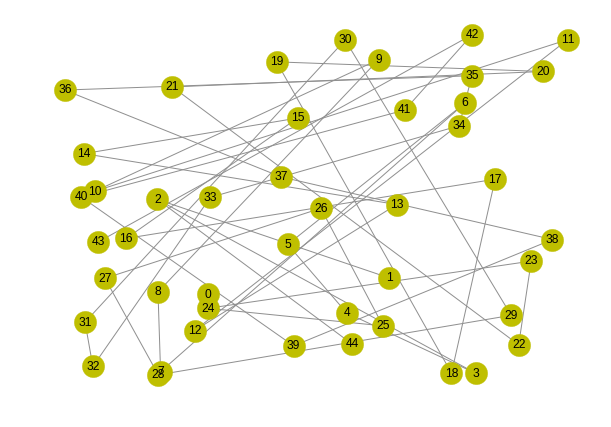

In [14]:

def dibujar_grafo(Nodos, Aristas):
  
  G=nx.Graph()
  
  G.clear()

  #Dibuja los nodos
  G.add_nodes_from(Nodos)
  print(Nodos)


  #Dibuja aristas
  aristas = Aristas +  [(70 ,1 )]
  #print(aristas)
  G.add_edges_from(aristas)


  #nx.draw_networkx_labels(G,pos,labels,font_size=16)

  labels = {}
  for idx, node in enumerate(G.nodes()):
      labels[node] =  idx 

  nx.draw_random(G,node_color='y',edge_color='#909090',node_size=500, labels = labels )


Nodos = list(map( lambda x:problem.get_display(x) ,problem.get_nodes()))
Aristas = list(map(lambda x: (x,x+1), problem.get_nodes()))

print(Aristas)


dibujar_grafo(Nodos,  Aristas)